# OMNIXAI - NATURAL LANGUAGE PROCESSING PREDICTION

### Install Packages

In [ ]:
pip install omnixai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.9/543.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 54.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
  Cr

In [ ]:
pip install dash

In [ ]:
pip install --upgrade dash

In [ ]:
pip install jupyter_dash

In [ ]:
pip install --upgrade jupyter-dash

In [ ]:
pip install dash-bootstrap-components

### Libraries

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from omnixai.data.tabular import Tabular
from omnixai.explainers.data import DataAnalyzer
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.explainers.tabular import TabularExplainer
from omnixai.explainers.prediction import PredictionAnalyzer
from omnixai.explainers.tabular import LimeTabular
from omnixai.preprocessing.base import Identity
from omnixai.preprocessing.encode import LabelEncoder
from omnixai.visualization.dashboard import Dashboard

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from omnixai.data.text import Text
from omnixai.explainers.nlp import LimeText
from omnixai.preprocessing.text import Tfidf
from omnixai.explainers.nlp import ShapText

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

### Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = '/content/drive/MyDrive/NLP_medquad.csv'
selected_labels = ['Breast Cancer', 'Prostate Cancer']
label_column = 'focus_area'

data = pd.read_csv(csv_path)
data

,question,answer,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,Glaucoma
...,...,...,...
16407,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,Diabetic Neuropathies: The Nerve Damage of Dia...
16408,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,Diabetic Neuropathies: The Nerve Damage of Dia...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,Diabetic Neuropathies: The Nerve Damage of Dia...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,Diabetic Neuropathies: The Nerve Damage of Dia...


In [ ]:
selected_data = data[data[label_column].isin(selected_labels)]
selected_data

,question,answer,focus_area
168,What is (are) Prostate Cancer ?,How Tumors Form The body is made up of many ty...,Prostate Cancer
169,Who is at risk for Prostate Cancer? ?,Scientists don't know exactly what causes pros...,Prostate Cancer
170,What are the symptoms of Prostate Cancer ?,"Symptoms Most cancers in their early, most tre...",Prostate Cancer
171,What are the treatments for Prostate Cancer ?,"If tests show that you have cancer, you should...",Prostate Cancer
172,What are the treatments for Prostate Cancer ?,Choosing Treatment There are a number of ways ...,Prostate Cancer
...,...,...,...
1309,How to prevent Prostate Cancer ?,Key Points\n - Avoiding ris...,Prostate Cancer
1310,Who is at risk for Prostate Cancer? ?,Avoiding risk factors and increasing protectiv...,Prostate Cancer
1311,what research (or clinical trials) is being do...,Cancer prevention clinical trials are used to ...,Prostate Cancer
1690,What is (are) Breast Cancer ?,Breast cancer affects one in eight women durin...,Breast Cancer


### Feature Selection

In [ ]:
x = selected_data['answer']
y = selected_data[label_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
class_names = label_encoder.classes_
# A TFDIF transform
transform = Tfidf().fit(x_train)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Class names:', class_names)

x_train shape: (76,)
x_test shape: (20,)
y_train shape: (76,)
y_test shape: (20,)
Class names: ['Breast Cancer' 'Prostate Cancer']


### Exploratory Data Analysis

  0%|          | 0/96 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribution of Answer length')

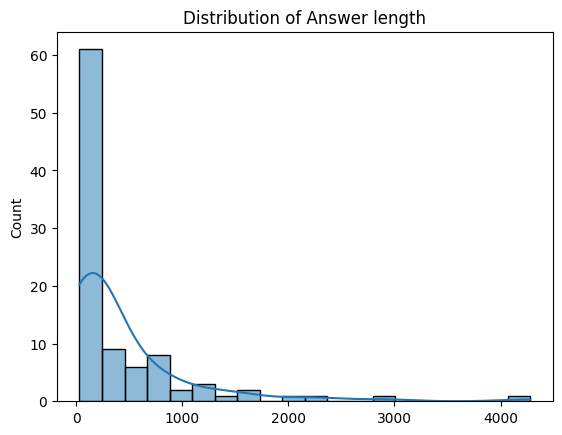

In [ ]:
#Distribution of Answer length

from tqdm.notebook import tqdm
length = []
for txt in tqdm(selected_data['answer'].values):
    length.append(len(txt.split()))

sns.histplot(length, kde = True, bins = 20)
plt.title('Distribution of Answer length')

Text(0.5, 1.0, 'Count of each disease')

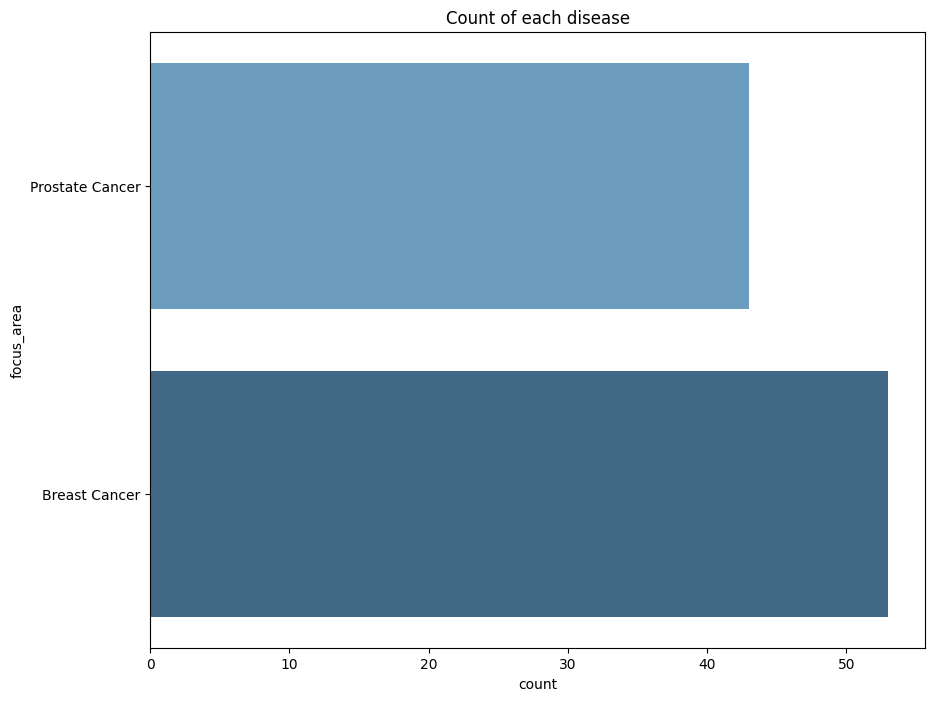

In [ ]:
plt.figure(figsize = (10, 8))

sns.countplot(y = selected_data['focus_area'], palette = 'Blues_d')
plt.title('Count of each disease')

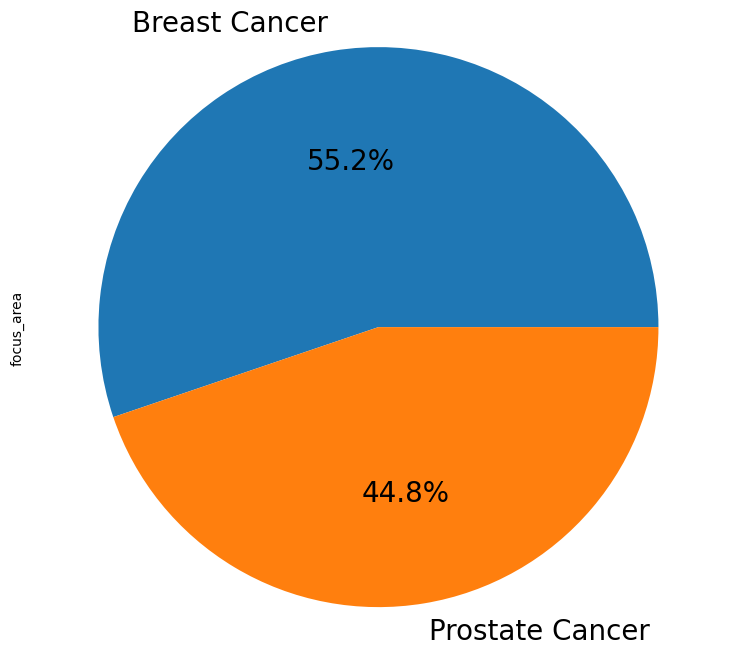

In [ ]:
# Calculate the value counts of the 'category' column
category_counts = selected_data['focus_area'].value_counts()

# Pie chart
plt.figure(figsize=(9, 8))
# Increase font size for labels
textprops = {"fontsize":20} # Font size of text in pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%', textprops=textprops)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

#plt.title('Pie Chart of Distribution')




# Add legend

#plt.legend()

plt.show()

(-0.5, 2999.5, 1999.5, -0.5)

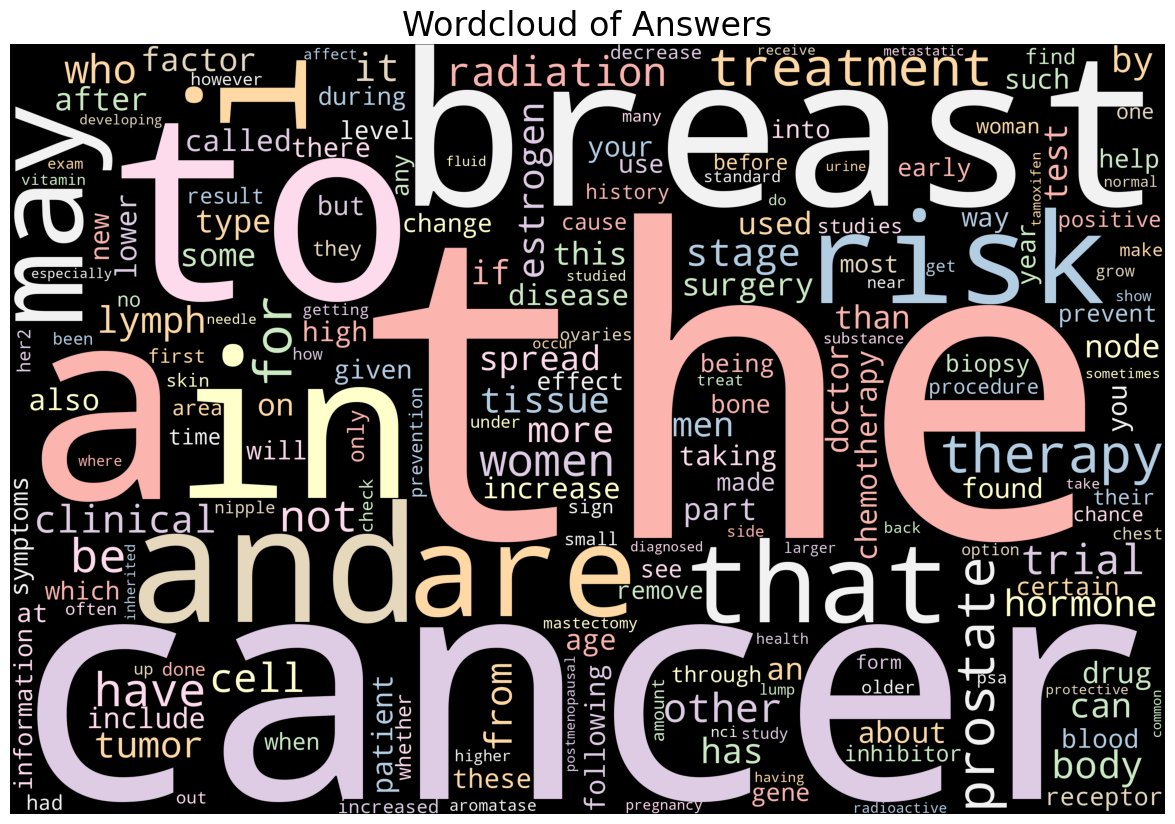

In [ ]:
# Import package
from wordcloud import WordCloud, STOPWORDS

body = '-'.join(selected_data['answer'].apply(lambda x: x.lower()).tolist())

# Generate word cloud
wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=1,
                      background_color='black',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords=['-', 'or', 'of', 'with', 'ago'])\
                      .generate(body)
# Plot
plt.rcParams["figure.figsize"] = (15, 10)
plt.imshow(wordcloud)
plt.title('Wordcloud of Answers', fontsize=24)
plt.axis('off')
#pep8(_ih)

### Prediction

In [ ]:
train_vectors = transform.transform(x_train)
test_vectors = transform.transform(x_test)
model = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
model.fit(train_vectors, y_train)
predict_function = lambda x: model.predict_proba(transform.transform(x))

predictions = model.predict(test_vectors)
print('Test accuracy: {}'.format(
    sklearn.metrics.f1_score(y_test, predictions, average='binary')))

Test accuracy: 0.9473684210526316


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , predictions)

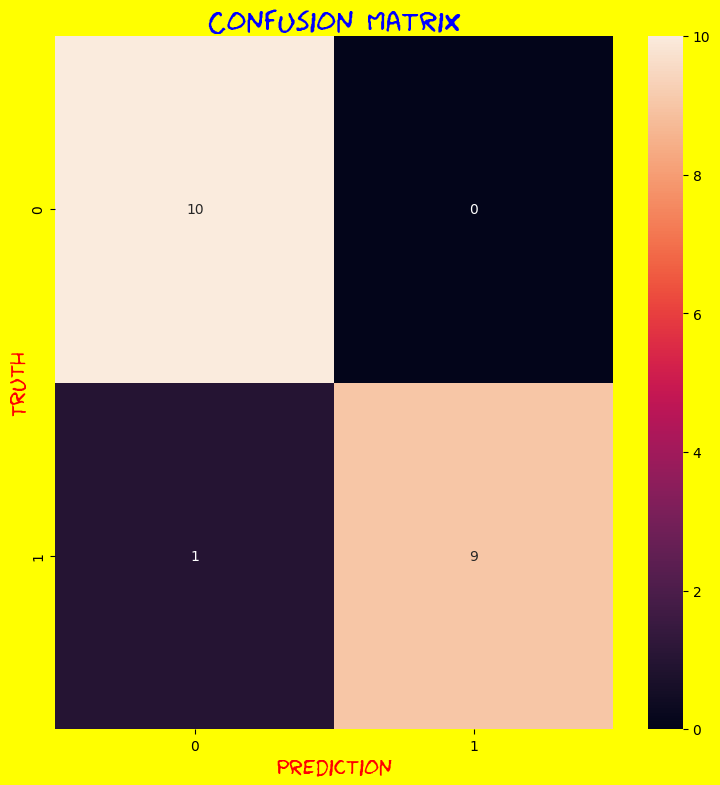

In [ ]:
font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), facecolor= 'yellow', edgecolor='red')
sns.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':20})
plt.show()

### LIME Explainer

In [ ]:
text_data_list = x_test.tolist()


In [ ]:
omnix_text = Text(text_data_list)

In [ ]:
omnix_text

['Signs of prostate cancer include a weak flow of urine or frequent urination. These and other signs and symptoms may be caused by prostate cancer or by other conditions. Check with your doctor if you have any of the following:         - Weak or interrupted ("stop-and-go") flow of urine.    - Sudden urge to urinate.    - Frequent urination (especially at night).    - Trouble starting the flow of urine.    - Trouble emptying the bladder completely.    - Pain or burning while urinating.    -  Blood in the urine or semen.    - A pain in the back, hips, or pelvis that doesn\'t go away.    - Shortness of breath, feeling very tired, fast heartbeat, dizziness, or pale skin caused by anemia.        Other conditions may cause the same symptoms. As men age, the prostate may get bigger and block the urethra or bladder. This may cause trouble urinating or sexual problems. The condition is called benign prostatic hyperplasia (BPH), and although it is not cancer, surgery may be needed. The symptoms 

In [ ]:
idx = 83
explainer = LimeText(predict_function=predict_function)
# Slice the list of text instances to get a sublist
text_instances = omnix_text[idx:idx+4]
# Convert the text instances to a list of strings
text_strings = [str(text_instance) for text_instance in text_instances]
# Explain the predictions for the text instances
explanations = explainer.explain(omnix_text)
explanations.ipython_plot(index=0, class_names=class_names)


In [ ]:
explanations.ipython_plot(index=1, class_names=class_names)

In [ ]:
explanations.ipython_plot(index=2, class_names=class_names)

In [ ]:
explanations.ipython_plot(index=8, class_names=class_names)

### SHAP Explainer

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.1 MB/s eta 0:00:00


In [ ]:
import transformers

# A transformer model for sentiment analysis
model = transformers.pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    return_all_scores=True
)

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [ ]:
model = model

In [ ]:
x = omnix_text

In [ ]:
explainer = ShapText(model=model)
explanations = explainer.explain(x)
explanations.ipython_plot()

Token indices sequence length is longer than the specified maximum sequence length for this model (5623 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: ignored

In [ ]:
x = Text([
           "How to prevent Glaucoma ?",
           "At this time, we do not know how to prevent glaucoma. However, studies have shown that the early detection and treatment of glaucoma, before it causes major vision loss, is the best way to control the disease. So, if you fall into one of the higher risk groups for the disease, make sure to have a comprehensive dilated eye exam at least once every one to two years.  Get tips on finding an eye care professional. Learn what a comprehensive dilated eye exam involves.",
           "What is (are) Breast Cancer ?",
           "Breast cancer affects one in eight women during their lives. Breast cancer kills more women in the United States than any cancer except lung cancer. No one knows why some women get breast cancer, but there are a number of risk factors. Risks that you cannot change include       - Age - the chance of getting breast cancer rises as a woman gets older     - Genes - there are two genes, BRCA1 and BRCA2, that greatly increase the risk. Women who have family members with breast or ovarian cancer may wish to be tested.     - Personal factors - beginning periods before age 12 or going through menopause after age 55       Other risks include being overweight, using hormone replacement therapy (also called menopausal hormone therapy), taking birth control pills, drinking alcohol, not having children or having your first child after age 35 or having dense breasts.    Symptoms of breast cancer may include a lump in the breast, a change in size or shape of the breast or discharge from a nipple. Breast self-exam and mammography can help find breast cancer early when it is most treatable. Treatment may consist of radiation, lumpectomy, mastectomy, chemotherapy and hormone therapy.    Men can have breast cancer, too, but the number of cases is small.    NIH: National Cancer Institute",
           "What is (are) Prostate Cancer ?",
           "The prostate is the gland below a man's bladder that produces fluid for semen. Prostate cancer is common among older men. It is rare in men younger than 40. Risk factors for developing prostate cancer include being over 65 years of age, family history, and being African-American.    Symptoms of prostate cancer may include       - Problems passing urine, such as pain, difficulty starting or stopping the stream, or dribbling    - Low back pain    - Pain with ejaculation       To diagnose prostate cancer, you doctor may do a digital rectal exam to feel the prostate for lumps or anything unusual. You may also get a blood test for prostate-specific antigen (PSA). These tests are also used in prostate cancer screening, which looks for cancer before you have symptoms. If your results are abnormal, you may need more tests, such as an ultrasound, MRI, or biopsy.    Treatment often depends on the stage of the cancer. How fast the cancer grows and how different it is from surrounding tissue helps determine the stage. Men with prostate cancer have many treatment options. The treatment that's best for one man may not be best for another. The options include watchful waiting, surgery, radiation therapy, hormone therapy, and chemotherapy. You may have a combination of treatments."
       ])

In [ ]:
explainer = ShapText(model=model)
explanations = explainer.explain(x)
explanations.ipython_plot()

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 3/6 [02:35<03:15, 65.01s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer:  67%|██████▋   | 4/6 [02:41<01:21, 40.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  83%|████████▎ | 5/6 [07:29<02:12, 132.93s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 6/6 [07:38<00:00, 89.74s/it] 

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 7it [12:10, 121.76s/it]


### Model & Prediction for LIME Explainer

In [ ]:
train_vectors = transform.transform(x_train)
test_vectors = transform.transform(x_test)
model_text = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
model_text.fit(train_vectors, y_train)
predict_function = lambda x: model_text.predict_proba(transform.transform(x))

predictions = model_text.predict(test_vectors)
#print('Test accuracy: {}'.format(sklearn.metrics.f1_score(y_test, predictions, average='binary')))
print('Test accuracy: {}'.format(accuracy_score(y_test, predictions)))
print("=============================================================================")
print(classification_report(y_test, predictions))
print("=============================================================================")
print(confusion_matrix(y_test, predictions))

Test accuracy: 0.9
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

[[10  0]
 [ 2  8]]


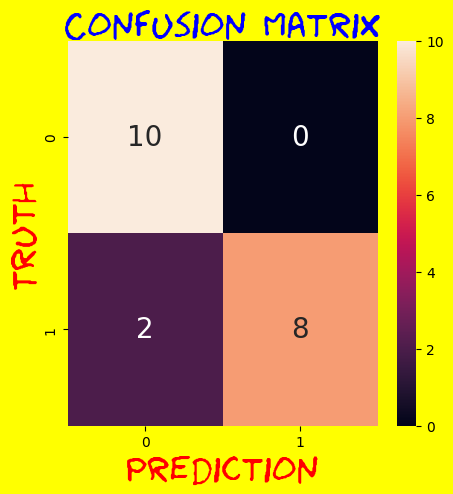

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , predictions)

font = {'family':'fantasy','color':'blue','size':25}
plt.figure(figsize=(5,5), facecolor= 'yellow', edgecolor='red')
sns.heatmap(cm , annot= True, fmt="d",annot_kws={"size": 20})
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'red','size':25})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'red','size':25})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'blue','size':25})
plt.show()

### Model and Prediction for SHAP Explainer


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.9 MB/s eta 0:00:00


In [ ]:
import transformers

# A transformer model for sentiment analysis
model_nlp_shap = transformers.pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



###  Explainers (LIME & SHAP)

#### LIME Explainer For Random Forest NLP Model

In [ ]:
text_data_list = x_test.tolist()


In [ ]:
omnix_test = Text(text_data_list)

In [ ]:
omnix_test

['Signs of prostate cancer include a weak flow of urine or frequent urination. These and other signs and symptoms may be caused by prostate cancer or by other conditions. Check with your doctor if you have any of the following:         - Weak or interrupted ("stop-and-go") flow of urine.    - Sudden urge to urinate.    - Frequent urination (especially at night).    - Trouble starting the flow of urine.    - Trouble emptying the bladder completely.    - Pain or burning while urinating.    -  Blood in the urine or semen.    - A pain in the back, hips, or pelvis that doesn\'t go away.    - Shortness of breath, feeling very tired, fast heartbeat, dizziness, or pale skin caused by anemia.        Other conditions may cause the same symptoms. As men age, the prostate may get bigger and block the urethra or bladder. This may cause trouble urinating or sexual problems. The condition is called benign prostatic hyperplasia (BPH), and although it is not cancer, surgery may be needed. The symptoms 

In [ ]:
idx = 83
explainer = LimeText(predict_function=predict_function)
# Slice the list of text instances to get a sublist
#text_instances = omnix_test[idx:idx+4]
# Convert the text instances to a list of strings
#text_strings = [str(text_instance) for text_instance in text_instances]
# Explain the predictions for the text instances
explanations = explainer.explain(omnix_test)
explanations.ipython_plot(index=0, class_names=class_names)


In [ ]:
explanations.ipython_plot(index=1, class_names=class_names)

In [ ]:
explanations.ipython_plot(index=2, class_names=class_names)

In [ ]:
explanations.ipython_plot(index=8, class_names=class_names)

#### SHAP Explainer For Distilbert NLP Model

In [ ]:
x = Text([
           "How to prevent Glaucoma ?",
           "At this time, we do not know how to prevent glaucoma. However, studies have shown that the early detection and treatment of glaucoma, before it causes major vision loss, is the best way to control the disease. So, if you fall into one of the higher risk groups for the disease, make sure to have a comprehensive dilated eye exam at least once every one to two years.  Get tips on finding an eye care professional. Learn what a comprehensive dilated eye exam involves.",
           "What is (are) Breast Cancer ?",
           "Breast cancer affects one in eight women during their lives. Breast cancer kills more women in the United States than any cancer except lung cancer. No one knows why some women get breast cancer, but there are a number of risk factors. Risks that you cannot change include       - Age - the chance of getting breast cancer rises as a woman gets older     - Genes - there are two genes, BRCA1 and BRCA2, that greatly increase the risk. Women who have family members with breast or ovarian cancer may wish to be tested.     - Personal factors - beginning periods before age 12 or going through menopause after age 55       Other risks include being overweight, using hormone replacement therapy (also called menopausal hormone therapy), taking birth control pills, drinking alcohol, not having children or having your first child after age 35 or having dense breasts.    Symptoms of breast cancer may include a lump in the breast, a change in size or shape of the breast or discharge from a nipple. Breast self-exam and mammography can help find breast cancer early when it is most treatable. Treatment may consist of radiation, lumpectomy, mastectomy, chemotherapy and hormone therapy.    Men can have breast cancer, too, but the number of cases is small.    NIH: National Cancer Institute",
           "What is (are) Prostate Cancer ?",
           "The prostate is the gland below a man's bladder that produces fluid for semen. Prostate cancer is common among older men. It is rare in men younger than 40. Risk factors for developing prostate cancer include being over 65 years of age, family history, and being African-American.    Symptoms of prostate cancer may include       - Problems passing urine, such as pain, difficulty starting or stopping the stream, or dribbling    - Low back pain    - Pain with ejaculation       To diagnose prostate cancer, you doctor may do a digital rectal exam to feel the prostate for lumps or anything unusual. You may also get a blood test for prostate-specific antigen (PSA). These tests are also used in prostate cancer screening, which looks for cancer before you have symptoms. If your results are abnormal, you may need more tests, such as an ultrasound, MRI, or biopsy.    Treatment often depends on the stage of the cancer. How fast the cancer grows and how different it is from surrounding tissue helps determine the stage. Men with prostate cancer have many treatment options. The treatment that's best for one man may not be best for another. The options include watchful waiting, surgery, radiation therapy, hormone therapy, and chemotherapy. You may have a combination of treatments."
       ])

In [ ]:
explainer = ShapText(model=model_nlp_shap)
explanations = explainer.explain(x)
explanations.ipython_plot()

  0%|          | 0/90 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 3/6 [03:21<04:35, 91.86s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 4/6 [03:29<01:53, 56.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 5/6 [07:51<02:13, 133.54s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 6/6 [08:01<00:00, 90.47s/it] 

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 7it [12:25, 124.23s/it]
